In [43]:
#Cell 1 – Imports & experiment configuration
import pandas as pd
import matplotlib.pyplot as plt
import os

BASE = r"C:\Users\wasee\Desktop\step1_results"
EXPERIMENTS = [
    {
        "name": "A1",
        "algo": "Cellpose v3 (default)",
        "path": os.path.join(BASE, "overlay_results_A1.csv")
    },
    {
        "name": "A2",
        "algo": "Omnipose (default)",
        "path": os.path.join(BASE, "overlay_results_A2.csv")
    },
    {
        "name": "A3",
        "algo": "StarDist (default)",
        "path": os.path.join(BASE, "overlay_results_A3.csv")
    },
    {
        "name": "A4",
        "algo": "Automatic thresholding (default)",
        "path": os.path.join(BASE, "overlay_results_A4.csv")
    },
]

# create output folder for figures & summary
OUT_DIR = "results_summary"
os.makedirs(OUT_DIR, exist_ok=True)


In [44]:
#Cell 2 – Load all CSVs and compute summary stats
summary_rows = []
all_frames = {}   # store per-frame data per experiment

for exp in EXPERIMENTS:
    path = exp["path"]
    if not os.path.exists(path):
        print(f"WARNING: file not found: {path}")
        continue
        
    df = pd.read_csv(path)
    
    # drop rows where IoU/Dice is empty (e.g. shape mismatch)
    df = df.dropna(subset=["iou", "dice"])
    
    exp["df"] = df
    all_frames[exp["name"]] = df
    
    mean_iou  = df["iou"].mean()
    std_iou   = df["iou"].std()
    mean_dice = df["dice"].mean()
    std_dice  = df["dice"].std()
    
    summary_rows.append({
        "Experiment": exp["name"],
        "Algorithm":  exp["algo"],
        "Mean IoU":   mean_iou,
        "IoU SD":     std_iou,
        "Mean Dice":  mean_dice,
        "Dice SD":    std_dice,
        "Frames":     len(df)
    })

summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values("Mean IoU", ascending=False).reset_index(drop=True)
summary_df


,Experiment,Algorithm,Mean IoU,IoU SD,Mean Dice,Dice SD,Frames
0,A1,Cellpose v3 (default),0.350398,0.126412,0.506511,0.136322,48
1,A4,Automatic thresholding (default),0.313711,0.115636,0.466373,0.130549,48
2,A3,StarDist (default),0.299677,0.124347,0.448016,0.140722,48
3,A2,Omnipose (default),0.213966,0.028334,0.351590,0.040173,48


In [45]:
#Cell 3 – Save summary table to CSV (for your report)
summary_path = os.path.join(OUT_DIR, "overlay_algorithms_summary.csv")
summary_df.to_csv(summary_path, index=False)
summary_path


'results_summary\\overlay_algorithms_summary.csv'

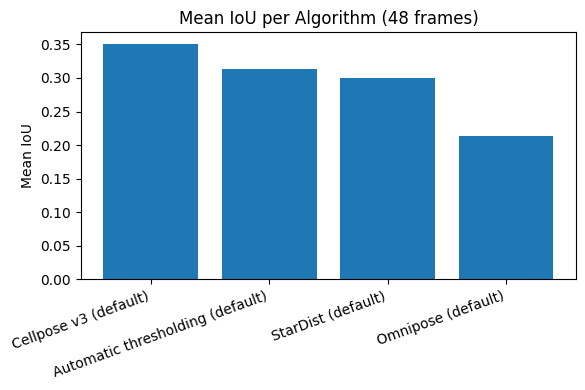

'results_summary\\mean_iou_per_algorithm.png'

In [46]:
#Cell 4 – Bar plot of mean IoU
plt.figure(figsize=(6, 4))

x = range(len(summary_df))
plt.bar(x, summary_df["Mean IoU"])

plt.xticks(x, summary_df["Algorithm"], rotation=20, ha="right")
plt.ylabel("Mean IoU")
plt.title("Mean IoU per Algorithm (48 frames)")
plt.tight_layout()

fig_iou_path = os.path.join(OUT_DIR, "mean_iou_per_algorithm.png")
plt.savefig(fig_iou_path, dpi=300)
plt.show()

fig_iou_path


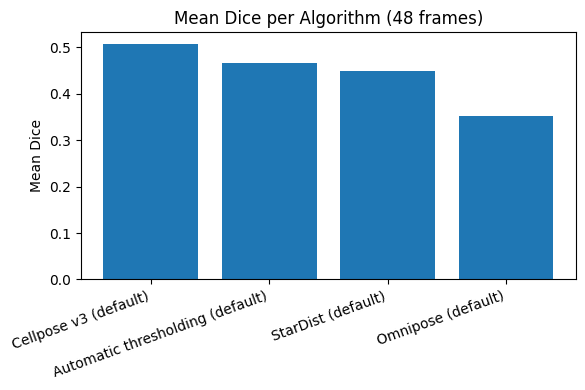

'results_summary\\mean_dice_per_algorithm.png'

In [47]:
#Cell 5 – Bar plot of mean Dice
plt.figure(figsize=(6, 4))

x = range(len(summary_df))
plt.bar(x, summary_df["Mean Dice"])

plt.xticks(x, summary_df["Algorithm"], rotation=20, ha="right")
plt.ylabel("Mean Dice")
plt.title("Mean Dice per Algorithm (48 frames)")
plt.tight_layout()

fig_dice_path = os.path.join(OUT_DIR, "mean_dice_per_algorithm.png")
plt.savefig(fig_dice_path, dpi=300)
plt.show()

fig_dice_path


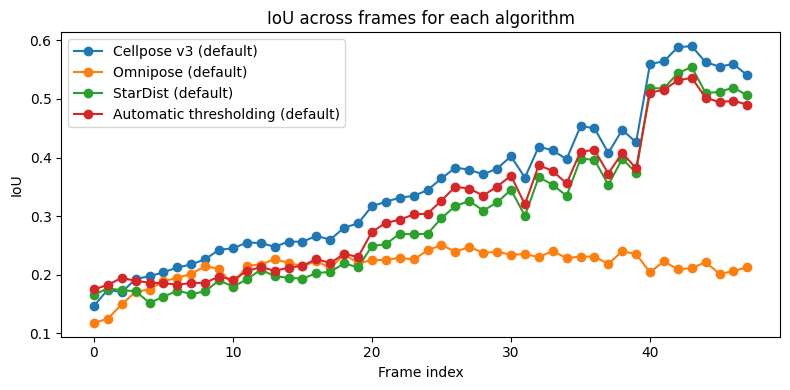

'results_summary\\iou_over_frames.png'

In [48]:
#Cell 6 – IoU across frames (line plot) for all algorithms
plt.figure(figsize=(8, 4))

for exp in EXPERIMENTS:
    if "df" not in exp:
        continue
    df = exp["df"]
    plt.plot(df["index"], df["iou"], marker="o", linestyle="-", label=exp["algo"])

plt.xlabel("Frame index")
plt.ylabel("IoU")
plt.title("IoU across frames for each algorithm")
plt.legend()
plt.tight_layout()

fig_iou_time_path = os.path.join(OUT_DIR, "iou_over_frames.png")
plt.savefig(fig_iou_time_path, dpi=300)
plt.show()

fig_iou_time_path


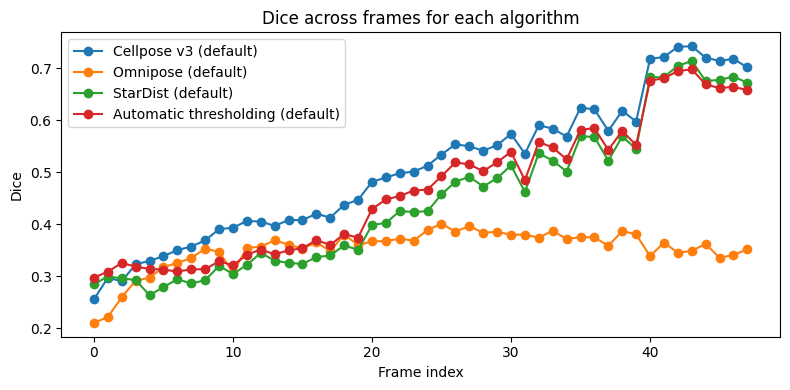

'results_summary\\dice_over_frames.png'

In [49]:
#Cell 7 – Dice across frames (optional)
plt.figure(figsize=(8, 4))

for exp in EXPERIMENTS:
    if "df" not in exp:
        continue
    df = exp["df"]
    plt.plot(df["index"], df["dice"], marker="o", linestyle="-", label=exp["algo"])

plt.xlabel("Frame index")
plt.ylabel("Dice")
plt.title("Dice across frames for each algorithm")
plt.legend()
plt.tight_layout()

fig_dice_time_path = os.path.join(OUT_DIR, "dice_over_frames.png")
plt.savefig(fig_dice_time_path, dpi=300)
plt.show()

fig_dice_time_path
